In [4]:
#Import relevant libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
import csv


from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import shutil

## Load Real Images

In [5]:
#this works as long as it is inside code/

images_path = os.getcwd().replace("\\", "/") + "/real_images/"

classes = range(0,44)

test_images = []

# Load images
for image in os.listdir(images_path):
    img = Image.open(images_path + image)

    #needs to resize
    img = img.resize((30, 30))

    #Convert image to numpy array (Feature Extraction)
    img = np.array(img)

    test_images.append(img)


X_test = np.array(test_images)

#### Labels

In [6]:
# Labels Translation
classes_translation = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Load Models

In [7]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')

In [8]:
import h5py
from tensorflow.keras.models import model_from_json, model_from_yaml

# Load model1
h5_file = h5py.File('trained_models/best_models/cnn4_1_98_original.h5', 'r')

json_string = h5_file.attrs['model_config']
model1 = model_from_json(json_string)
model1.load_weights('trained_models/best_models/cnn4_1_98_original.h5')

h5_file.close()

# Load model2
h5_file_2 = h5py.File('trained_models/best_models/cnn3_97.h5', 'r')

json_string = h5_file_2.attrs['model_config']
model2 = model_from_json(json_string)
model2.load_weights('trained_models/best_models/cnn3_97.h5')

h5_file.close()

# Load model3
h5_file_3 = h5py.File('trained_models/best_models/cnn4_1_98_aug.h5', 'r')

json_string = h5_file_3.attrs['model_config']
model3 = model_from_json(json_string)
model3.load_weights('trained_models/best_models/cnn4_1_98_aug.h5')

# Load model4
h5_file_4 = h5py.File('trained_models/best_models/cnn3_96_aug.h5', 'r')

json_string = h5_file_4.attrs['model_config']
model4 = model_from_json(json_string)
model4.load_weights('trained_models/best_models/cnn3_96_aug.h5')

# Load model6
h5_file_6 = h5py.File('trained_models/best_models/cnn3_3_95_original.h5', 'r')

json_string = h5_file_6.attrs['model_config']
model6 = model_from_json(json_string)
model6.load_weights('trained_models/best_models/cnn3_3_95_original.h5')

# Load model7
h5_file_7 = h5py.File('trained_models/best_models/cnn3_2_97_aug.h5', 'r')

json_string = h5_file_7.attrs['model_config']
model7 = model_from_json(json_string)
model7.load_weights('trained_models/best_models/cnn3_2_97_aug.h5')


In [22]:
print(len(X_test))

21


## Predict

1/1 [==============================] - 0s 34ms/step


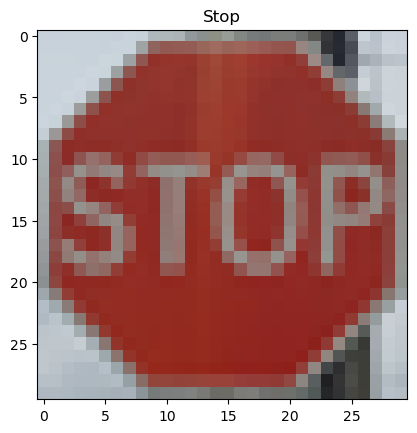

1/1 [==============================] - 0s 40ms/step


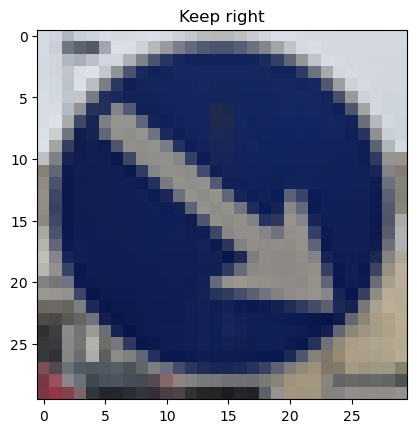

1/1 [==============================] - 0s 33ms/step


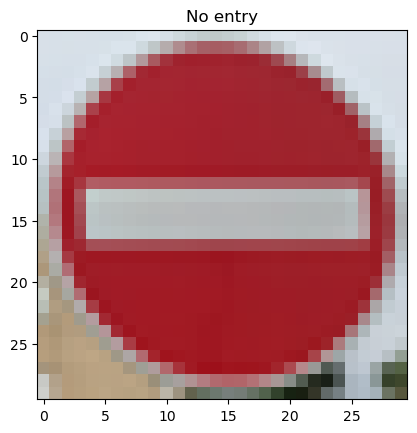

1/1 [==============================] - 0s 40ms/step


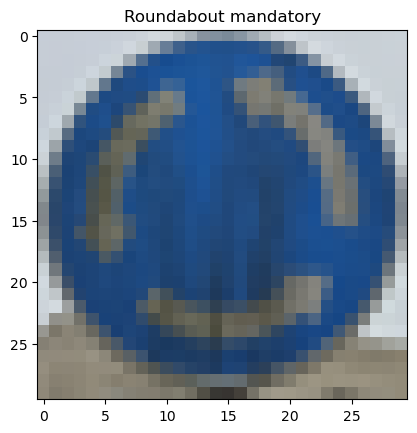

1/1 [==============================] - 0s 36ms/step


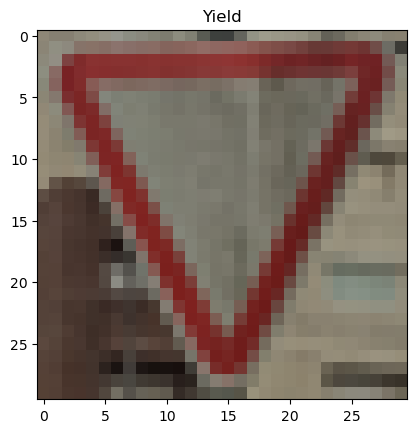

1/1 [==============================] - 0s 32ms/step


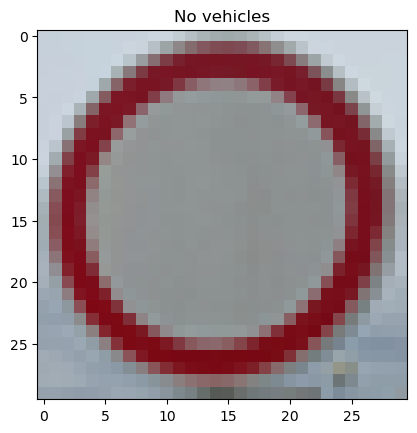

1/1 [==============================] - 0s 33ms/step


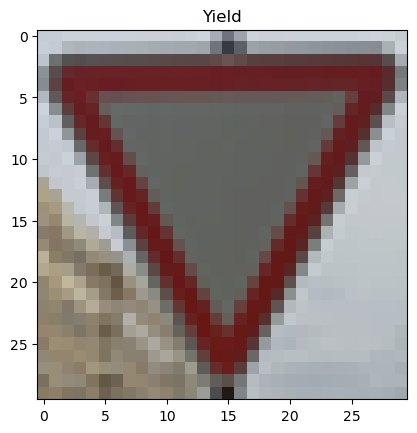

1/1 [==============================] - 0s 38ms/step


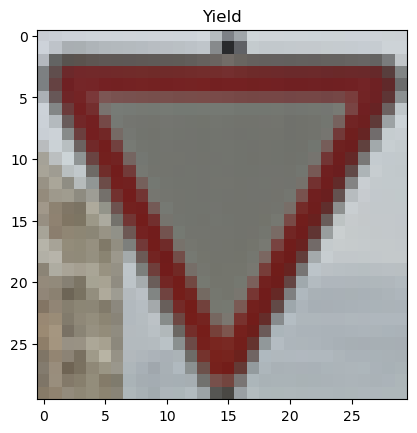

1/1 [==============================] - 0s 32ms/step


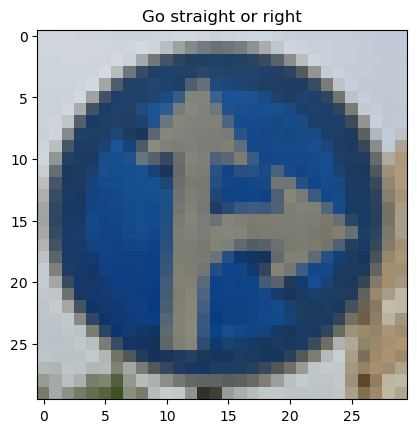

1/1 [==============================] - 0s 37ms/step


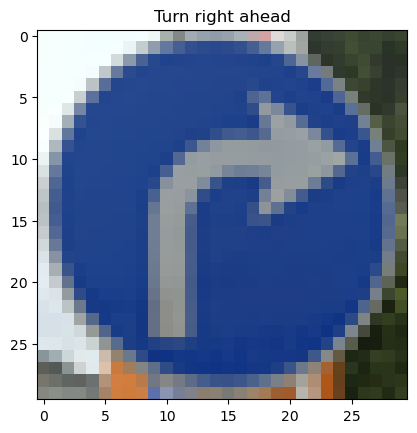

1/1 [==============================] - 0s 33ms/step


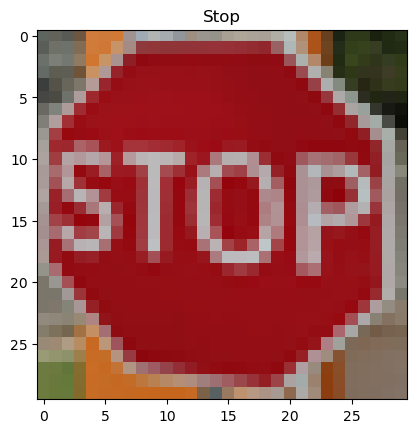

1/1 [==============================] - 0s 35ms/step


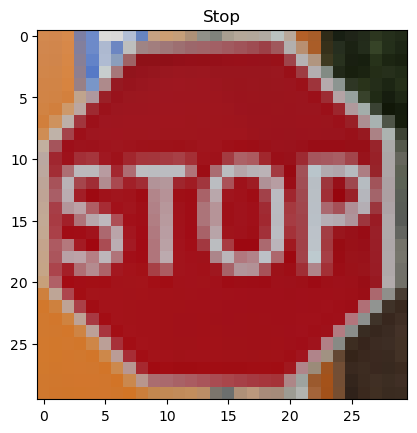

1/1 [==============================] - 0s 34ms/step


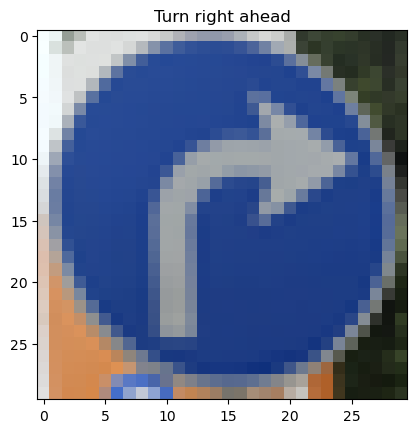

1/1 [==============================] - 0s 37ms/step


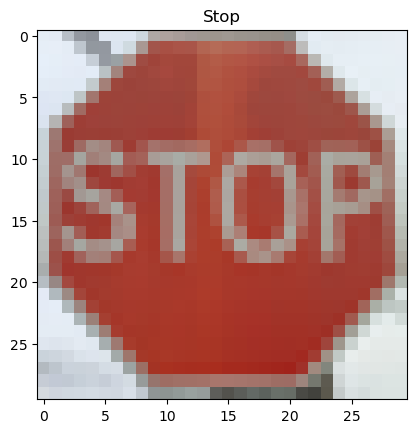

1/1 [==============================] - 0s 34ms/step


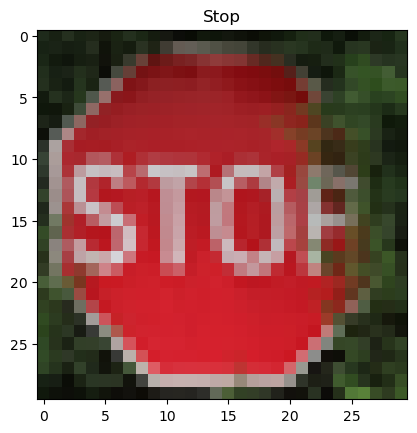

1/1 [==============================] - 0s 34ms/step


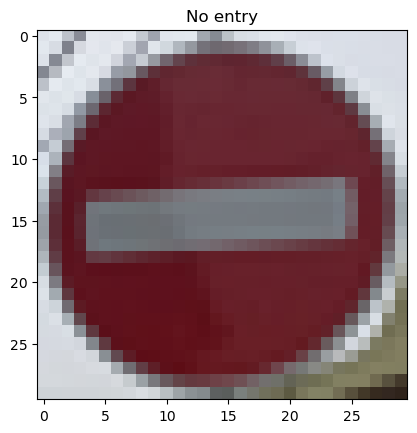

1/1 [==============================] - 0s 36ms/step


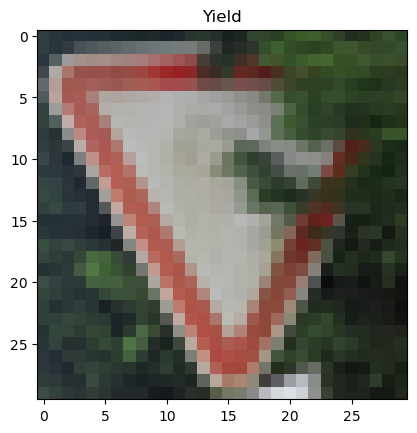

1/1 [==============================] - 0s 32ms/step


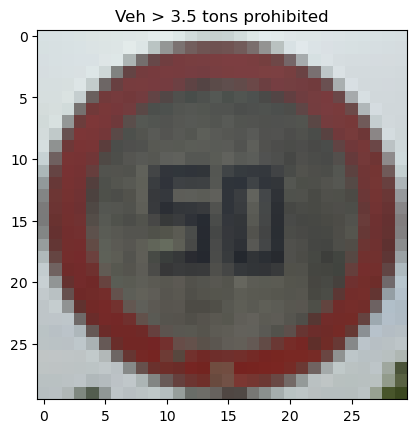

1/1 [==============================] - 0s 33ms/step


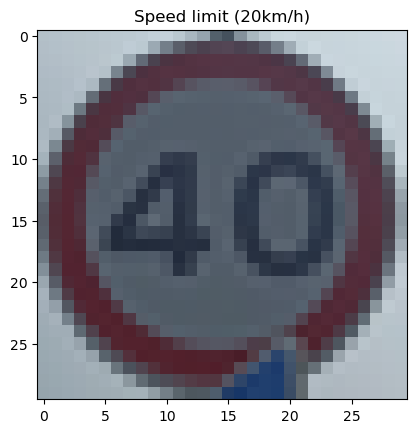

1/1 [==============================] - 0s 30ms/step


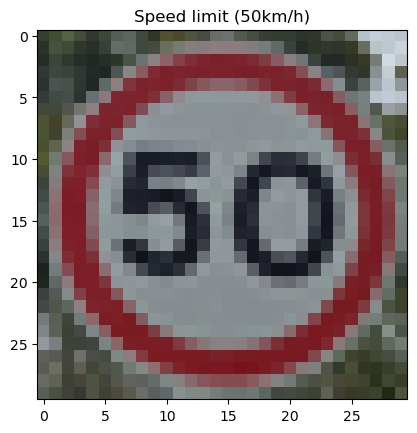

1/1 [==============================] - 0s 33ms/step


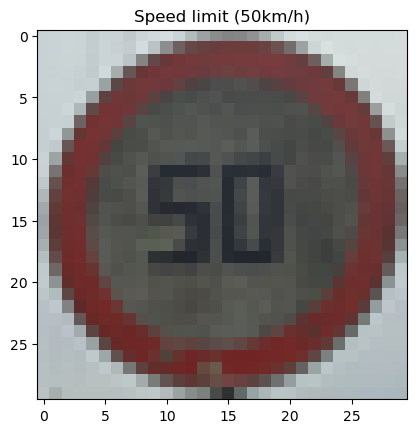

In [32]:
for i in X_test:
    i = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])

    predicted1 = model1.predict(i)
    predicted2 = model2.predict(i)
    predicted3 = model3.predict(i)
    predicted4 = model4.predict(i)
    predicted6 = model6.predict(i)
    predicted7 = model7.predict(i)


    predicted_sum = predicted1 + predicted2 + predicted3 + predicted7 + predicted4  + predicted6

    # Show the image and the predicted class
    # plt.label = np.argmax(predicted_sum, axis = 1)
    # plt.imshow(i)
    # plt.show()

    # Plot the image and the predicted class as the title
    plt.title(classes_translation[np.argmax(predicted_sum, axis = 1)[0]])
    plt.imshow(i[0])
    plt.show()
    

## Same test but using the grayscale models and images